<a href="https://colab.research.google.com/github/RamyaKV134/FMML_COURSE_ASSIGNMENT/blob/main/FMML_Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Jashn Arora

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

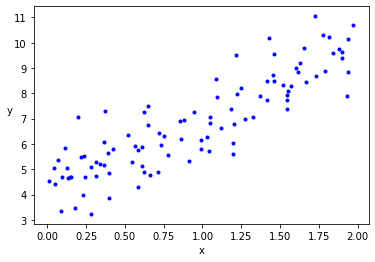

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

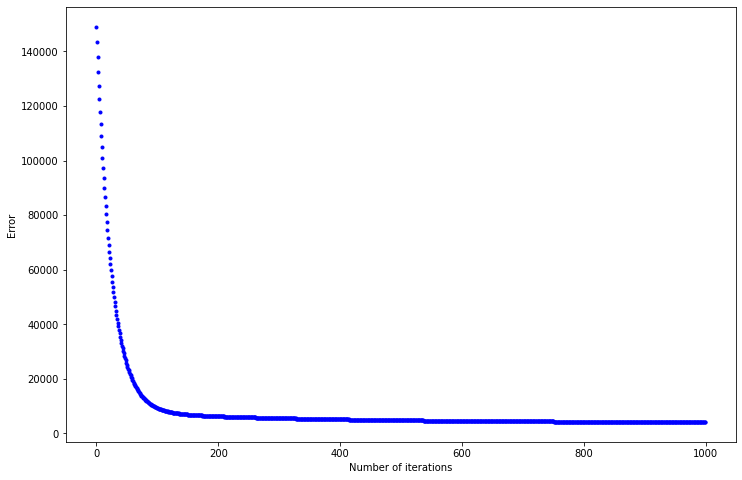

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

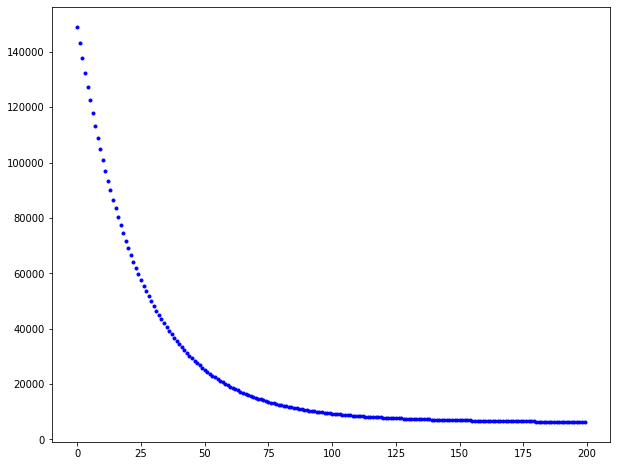

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


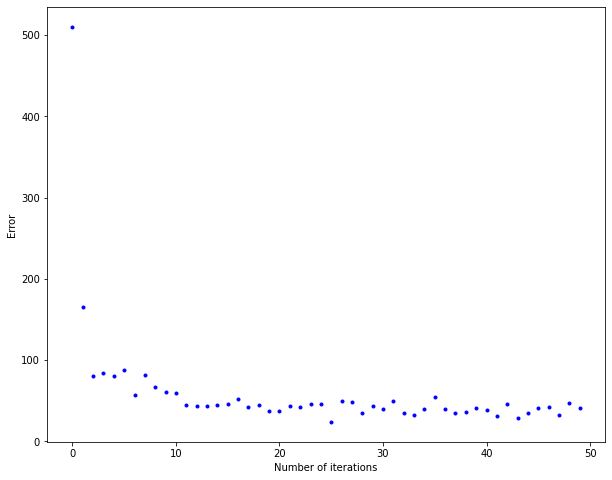

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


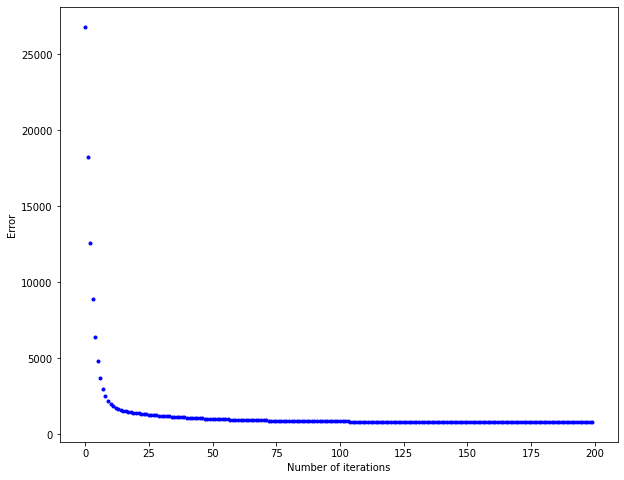

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

# ANSWER 1

-----------------------------------
when batch size is 5
y_pred[0]: 6.918
y_pred[1]: -0.259
Final error: 3458.690
______________________________________
-----------------------------------
when batch size is 10
y_pred[0]: 6.945
y_pred[1]: -0.309
Final error: 3450.604
______________________________________
-----------------------------------
when batch size is 15
y_pred[0]: 6.881
y_pred[1]: -0.186
Final error: 3464.577
______________________________________
-----------------------------------
when batch size is 25
y_pred[0]: 6.865
y_pred[1]: -0.154
Final error: 3469.246
______________________________________
-----------------------------------
when batch size is 50
y_pred[0]: 6.974
y_pred[1]: -0.359
Final error: 3440.844
______________________________________
-----------------------------------
when batch size is 80
y_pred[0]: 6.951
y_pred[1]: -0.321
Final error: 3451.713
______________________________________


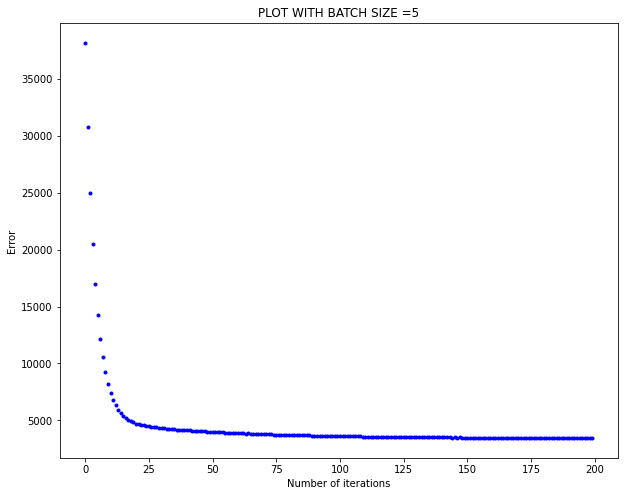

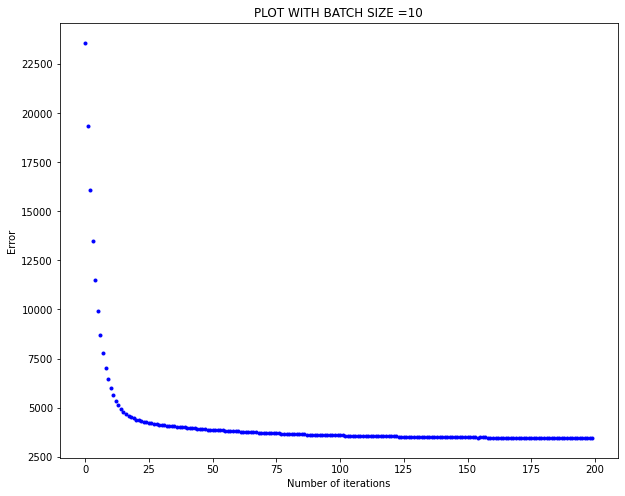

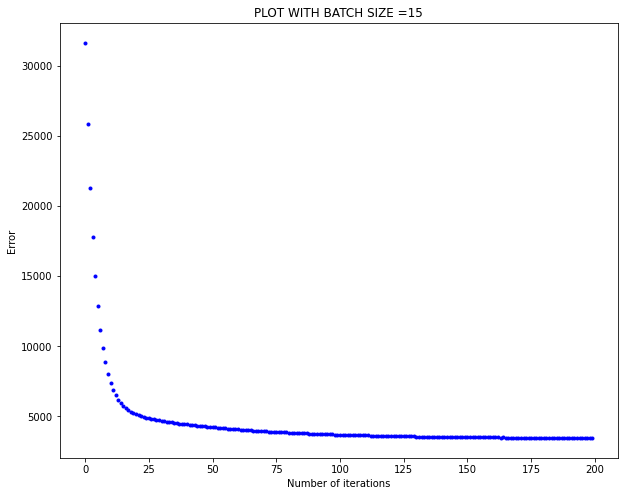

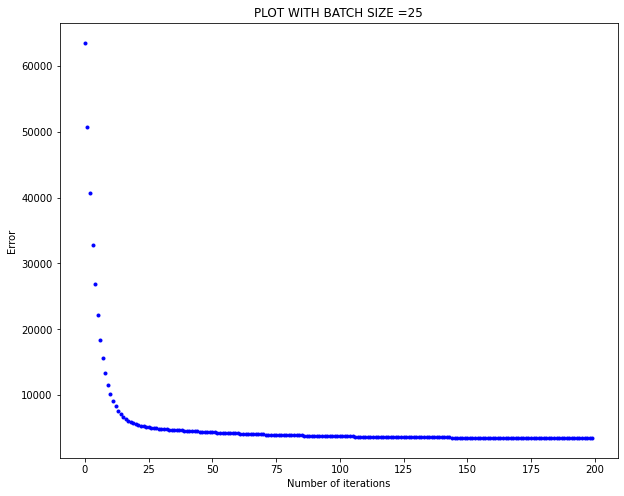

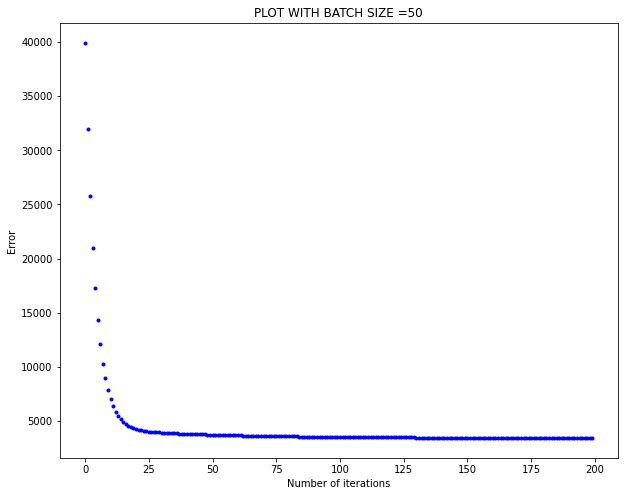

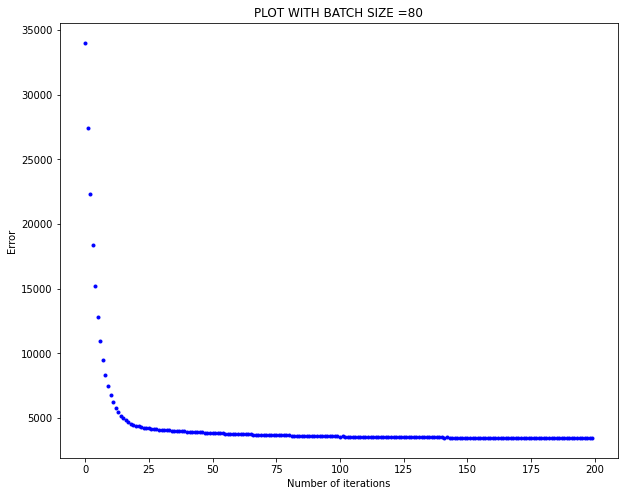

In [ ]:
import numpy as np
s = [5, 10, 15, 25, 50, 80]
for I in s:
    def minibatch_gradient_descent_new(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=I):
        '''
        X = Matrix of X without added bias units
        y = Vector of Y
        y_pred = Vector of y_preds np.random.randn(j, 1)
        learning_rate 
        iterations = no of iterations
     
        Returns the final theta vector and array of cost history over no of iterations
        '''

        m = len(y)
        cost_history = np.zeros(iterations)
        n_batches = int(m / batch_size)
    
        for it in range(iterations):
            cost = 0.0
            indices = np.random.permutation(m)
            X = X[indices]
            y = y[indices]

            for i in range(0, m, batch_size):
                X_i = X[i: i + batch_size]
                y_i = y[i: i + batch_size]
            
                X_i = np.c_[np.ones(len(X_i)), X_i]
                prediction = np.dot(X_i, y_pred)

                y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
                cost += cal_cost(y_pred, X_i, y_i)

            cost_history[it]  = cost
        
        return y_pred, cost_history
    lr = 0.1
    n_iter = 200
    y_pred = np.random.randn(2,1)
    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)
    print("-----------------------------------") 
    print(f"when batch size is {I}") 
    print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
    print('Final error: {:0.3f}'.format(cost_history[-1]))

    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_title(f"PLOT WITH BATCH SIZE ={I}") 
    ax.set_ylabel('Error')
    ax.set_xlabel('Number of iterations')
    y_pred = np.random.randn(2,1)
    print("______________________________________") 
    ax.plot(range(n_iter), cost_history, 'b.')

# ANSWER 2

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/preprocessed_diabetes_data (7).csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [ ]:
dataset['Outcome'].loc[(dataset['Outcome'] == 0)] = -1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,-1
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,-1
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [ ]:
X = dataset['DiabetesPedigreeFunction'].to_numpy()

In [ ]:
print(y[0:10])
print("SHAPE OF Y IS")
print(y.shape)

[[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]
 [5.29307969]
 [5.82639572]
 [8.67878666]
 [6.79819647]
 [7.74667842]]
SHAPE OF Y IS
(100, 1)


y_pred[0]: 6.906
y_pred[1]: -0.230
Final error: 1729.929


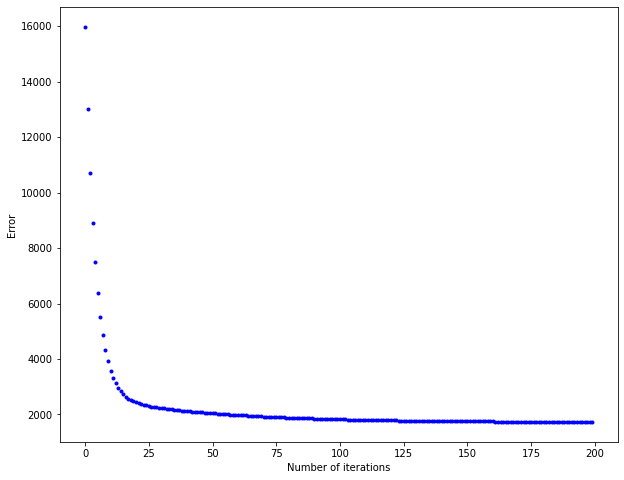

In [ ]:
#mini batch gradient descent
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size = 10)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [ ]:
y_pred = np.random.randn(2,1)
print(y_pred)

[[ 0.61027973]
 [-1.22131946]]


y_pred[0]: 6.249
y_pred[1]: 1.009
Final error: 191.523


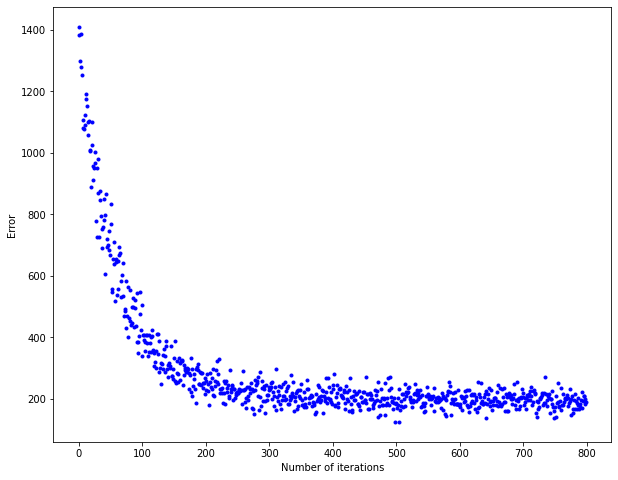

In [ ]:
#Stochastic gradient descent
lr = 0.007
n_iter = 800
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history  
     

**Answer:03**

Learning Rate: 0.1
y_pred[0]: 4.098
y_pred[1]: 2.968
Batch GD: Final error: 5578.112
-------------------------------------------------
-------------------------------------------------
y_pred[0]: 4.062
y_pred[1]: 2.940
SGD: Final error: 40.482
---------------------------------------------------
---------------------------------------------------
y_pred[0]: 4.099
y_pred[1]: 2.970
Mini-Batch GD Final error: 1112.466
--------------------------------------------------------
--------------------------------------------------------
Learning Rate: 0.01
y_pred[0]: 3.771
y_pred[1]: 3.247
Batch GD: Final error: 5713.024
-------------------------------------------------
-------------------------------------------------
y_pred[0]: 4.086
y_pred[1]: 2.972
SGD: Final error: 41.429
---------------------------------------------------
---------------------------------------------------
y_pred[0]: 4.014
y_pred[1]: 3.040
Mini-Batch GD Final error: 1117.248
-------------------------------------------------

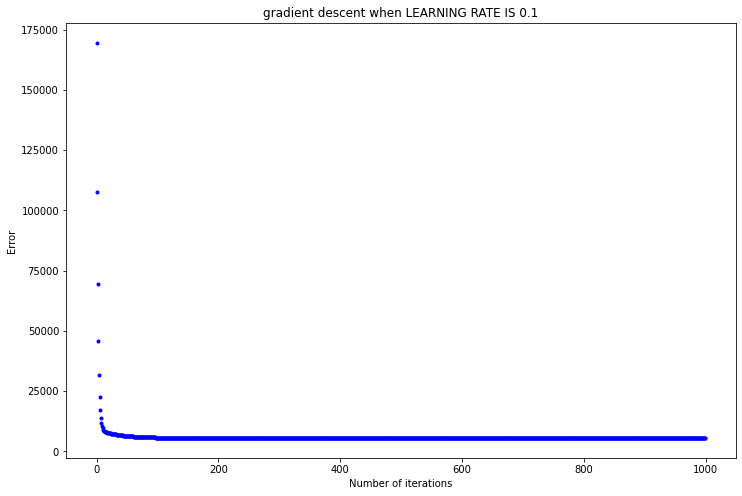

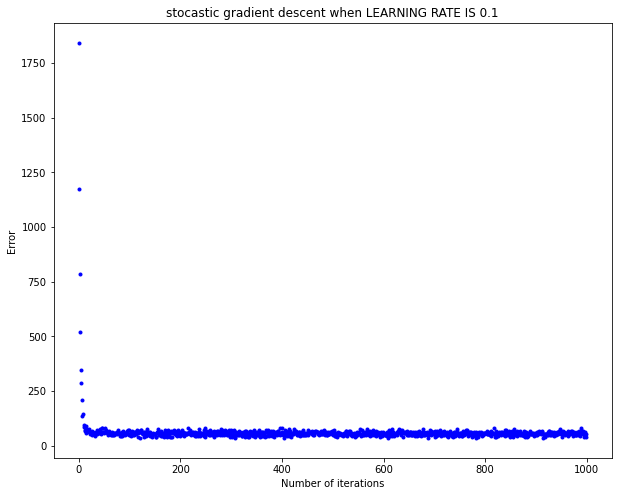

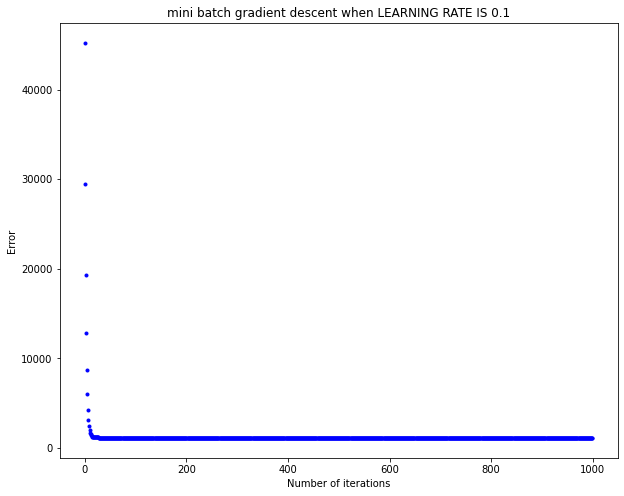

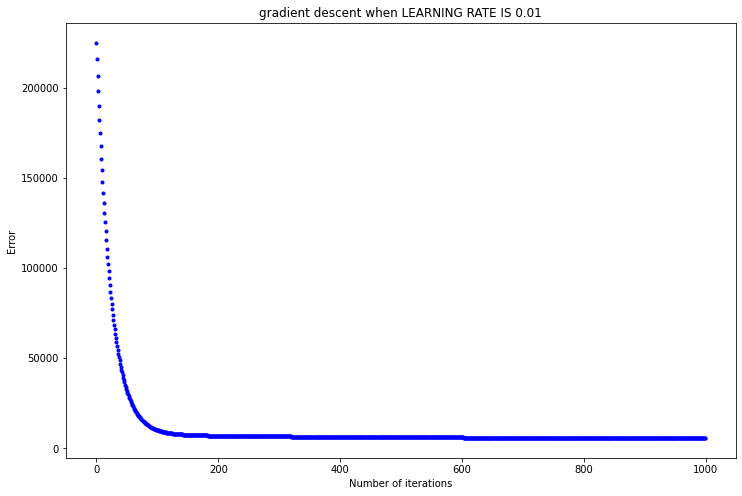

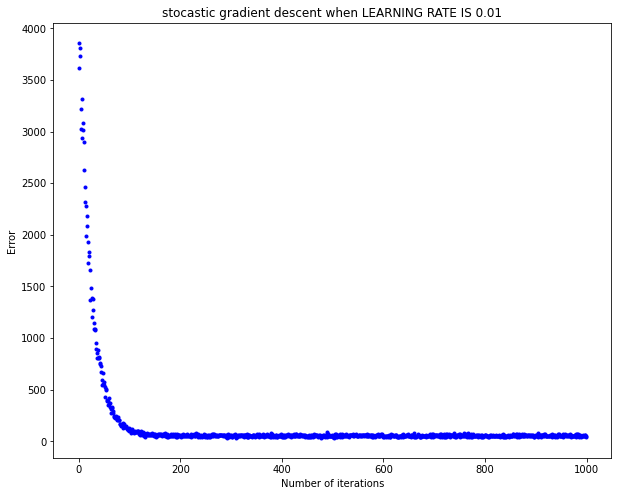

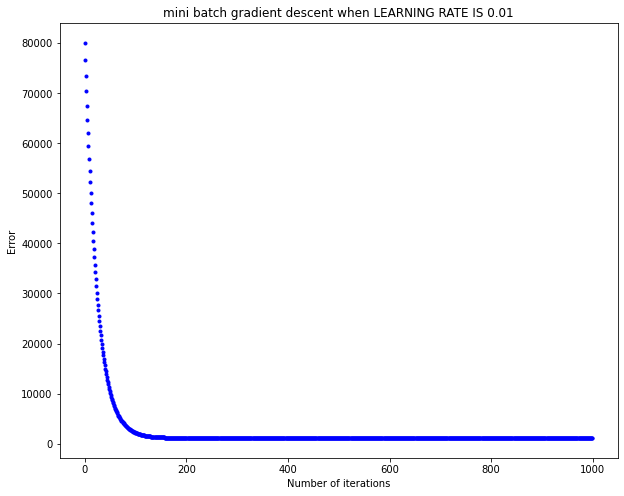

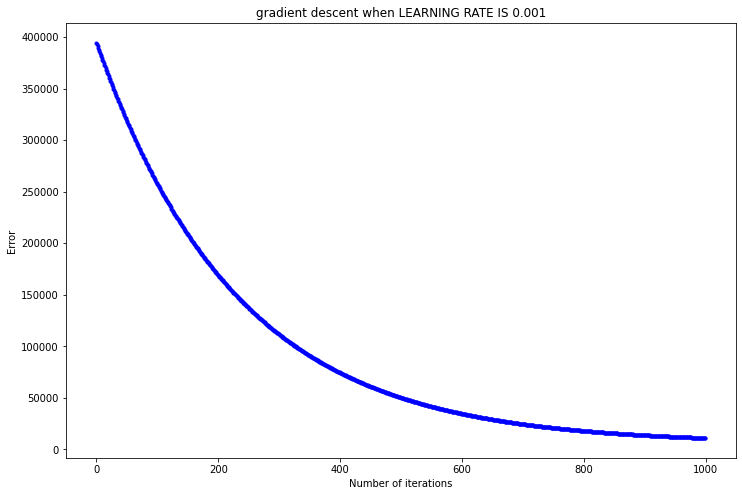

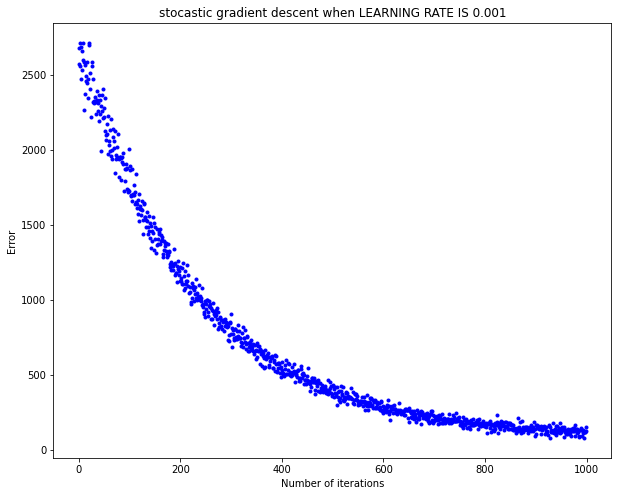

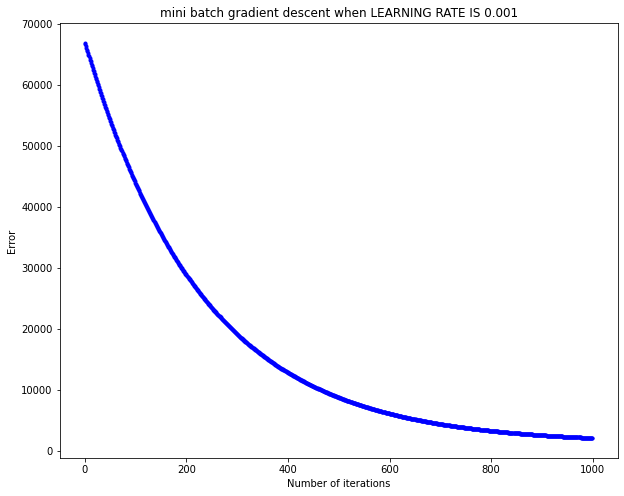

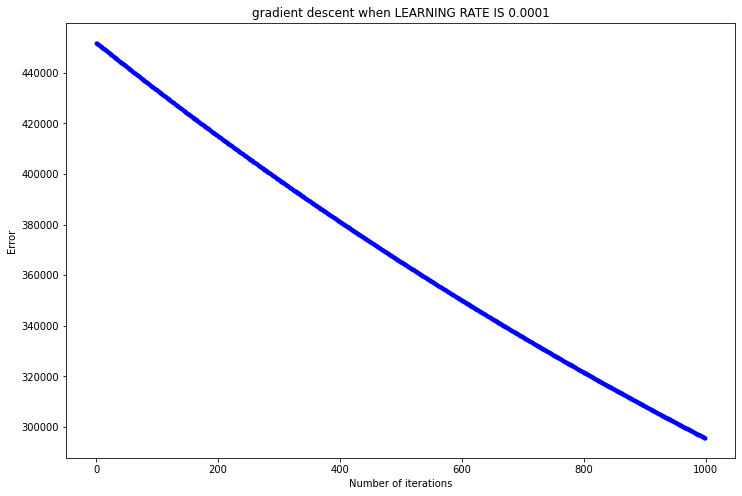

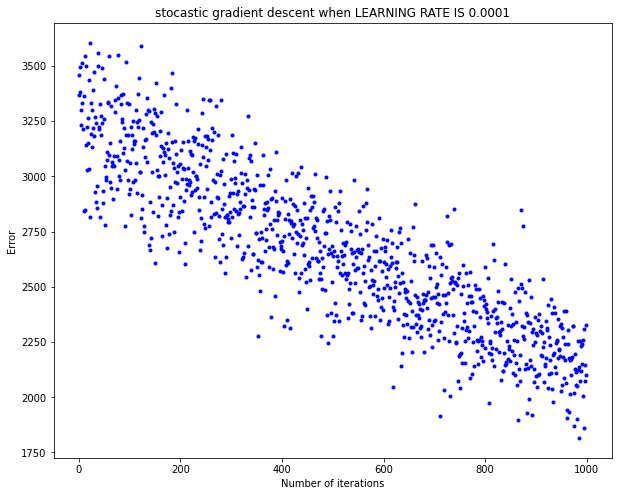

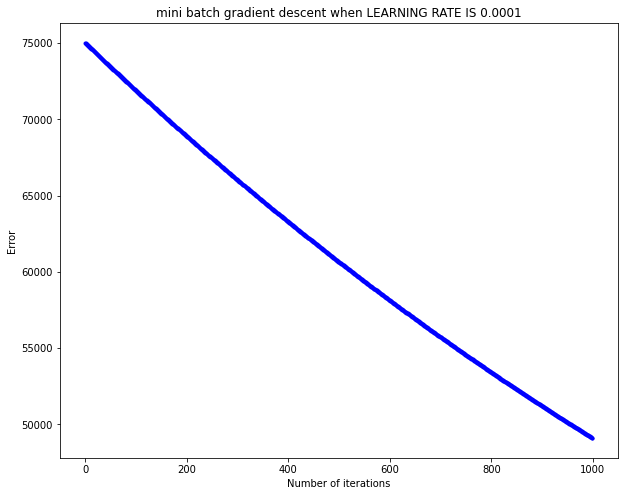

In [ ]:
lr_array = [0.1, 0.01, 0.001, 0.0001]
n_iter = 1000

final_list = []

for i in lr_array:

  d = {}

  print(f"Learning Rate: {i}")
  #Gradient descent
  y_pred = np.random.randn(2,1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, i, n_iter)
  d[1] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Batch GD: Final error: {:0.3f}'.format(cost_history[-1]))
  print('-------------------------------------------------')
  print('-------------------------------------------------')
  fig, ax = plt.subplots(figsize=(12,8))

  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  ax.set_title(f"gradient descent when LEARNING RATE IS {i}")
  ax.plot(range(n_iter), cost_history, 'b.')



  # Stocastic
  y_pred = np.random.randn(2, 1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, i, n_iter)
  d[2] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('SGD: Final error: {:0.3f}'.format(cost_history[-1]))
  print("---------------------------------------------------")
  print("---------------------------------------------------")
  fig, ax = plt.subplots(figsize=(10,8))

  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  ax.set_title(f"stocastic gradient descent when LEARNING RATE IS {i}")
  y_pred = np.random.randn(2,1)

  ax.plot(range(n_iter), cost_history, 'b.')

  # Mini Batch
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, i, n_iter)
  d[3] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Mini-Batch GD Final error: {:0.3f}'.format(cost_history[-1]))
  print("--------------------------------------------------------")
  print("--------------------------------------------------------")

  fig, ax = plt.subplots(figsize=(10,8))

  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  ax.set_title(f"mini batch gradient descent when LEARNING RATE IS {i}")
  y_pred = np.random.randn(2,1)

  ax.plot(range(n_iter), cost_history, 'b.')

  final_list.append(d)

# observation
 

 We can see that as explained above SGD converge faster in all the cases. For BGD we need more number of iterations compared to SGD and MBGD. MBGD falls somewhat in middle of SGD and BGD